<h2><center> Clustering Uber Rideshare Data 

Using August 2015 Uber pickup data from FiveThirtyEight, we apply a K-means model to understand trips taken with Uber. This can be used to optimize pricing and car positioning for more affordable and faster service.  

In [ ]:
# Import packages 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import folium
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [166]:
# Read in August Uber data 
df = pd.read_csv("uber-raw-data-aug14.csv")
print(df.shape)
df.head()

(829275, 4)


,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


**Date/Time**: Date and Time of Uber pickup <br/>
**Lat**: Latitude of pickup <br/>
**Lon**: Longitude of pickup <br/> 
**Base**: TLC base company code affiliated with pickup <br/>

In [167]:
# Create new df with lat lon columns 
clus = df[['Lat','Lon']]
clus.dtypes

Lat    float64
Lon    float64
dtype: object

In [168]:
# Apply kmeans alg to clus df to find optimal k-value 
kmeans = KMeans(n_clusters=6, max_iter=300, random_state=12345)
kmeans.fit(clus)

KMeans(n_clusters=6, random_state=12345)

In [169]:
# Identify six centroids 
centroids = kmeans.cluster_centers_
centroids

array([[ 40.76716604, -73.97150997],
       [ 40.66806839, -73.75644121],
       [ 40.68637486, -73.96276621],
       [ 40.69995129, -74.20072696],
       [ 40.7309685 , -73.99778807],
       [ 40.79689153, -73.87433905]])

In [170]:
lat_df = pd.DataFrame(centroids[:,0])
lon_df = pd.DataFrame(centroids[:,1])

In [171]:
# Convert centroids data to panda df 
clocation = lat_df.merge(lon_df, left_index = True, right_index=True)
clocation.columns = ['Latitude', 'Longitude']
clocation

,Latitude,Longitude
0,40.767166,-73.971510
1,40.668068,-73.756441
2,40.686375,-73.962766
3,40.699951,-74.200727
4,40.730969,-73.997788
5,40.796892,-73.874339


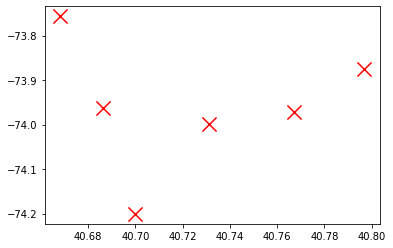

In [172]:
# Scatter plot of centroids 
plt.scatter(clocation['Latitude'], clocation['Longitude'], marker='x',color='red',s=200)
plt.show()

In [209]:
# Plot centroids on map using Folium 
centroid=clocation.values.tolist()
map=folium.Map(location=[40.767166, -73.971510], zoom_start=10)
for point in range(0, len(centroid)): 
    folium.Marker(centroid[point], popup=centroid[point]).add_to(map)
map

In [210]:
# Assign each row of df to a cluster 
predict=kmeans.predict(clus)
df['Clusters']=pd.Series(predict, index=df.index)

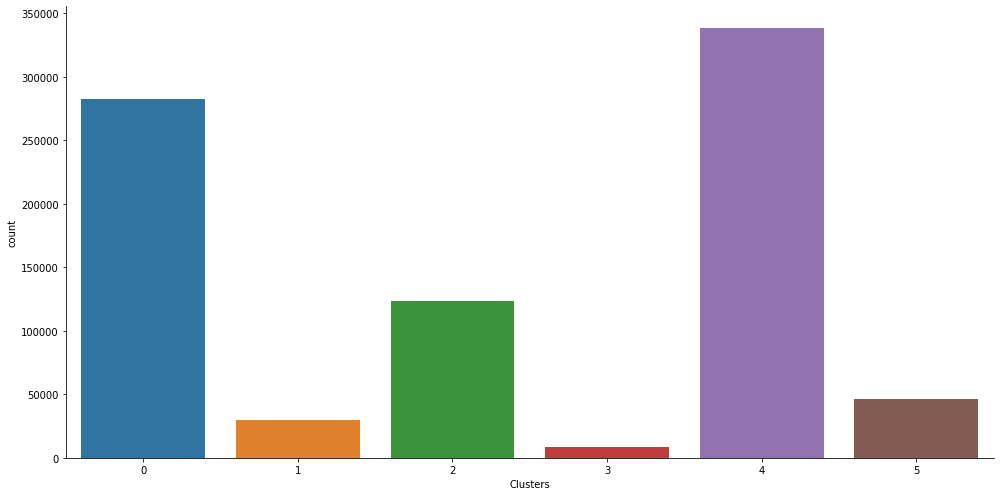

In [201]:
# Bar graph of number of rides in each cluster 
sb.factorplot(data=df, x='Clusters', kind='count', size=7, aspect=2)

In [211]:
# Given a new pickup location, assign value to a cluster 
new_location=[(40.6556, -73.5631)]
kmeans.predict(new_location)

array([1], dtype=int32)

Citation: https://www.kdnuggets.com/2020/07/clustering-rideshare-data-uber.html
Data: https://github.com/fivethirtyeight/uber-tlc-foil-response